In [253]:
import os
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.models import model_from_json

In [254]:
current_location = os.getcwd()
data_location = "data/"

# read the data

In [255]:
fopen = open(data_location + "pattern.txt", "r")
patterns = fopen.read()
fopen.close()

In [256]:
patterns = patterns.split("\n")
patterns = patterns[:len(patterns) - 1]

In [257]:
patterns_final = []
for k in range(len(patterns)):
    if len(patterns[k]) == 10:
        patterns_final.append(patterns[k].upper())
        
print ("Given patterns :", len(patterns_final))

Given patterns : 82


In [258]:
data_prep = []
for k in range(len(patterns_final)):
    one = []
    for m in range(len(patterns_final[k])):
        one.append(ord(patterns_final[k][m]) - ord('A') + 1)
    data_prep.append(one)

In [259]:
print (data_prep[9], patterns_final[9])

[1, 2, 3, 3, 1, 2, 2, 3, 1, 2] ABCCABBCAB


# data in training format
## model-1 : target will only 1

In [260]:
input_ = []
target_ = []

input_size = 5
dimension = 1

for k in range(len(data_prep)):
    one = []
    two = []
    for m in range(10 - input_size):
        one.append(data_prep[k][m:input_size + m])
        two.append(data_prep[k][input_size + m])
    
    three = []
    six = []
    for p in range(len(one) + 1 - dimension):
        four = []
        five = []
        for l in range(dimension):
            four.append(one[p + l])
            five.append(two[p + l])
        three.append(four)
        six.append(five)
    
    for b in range(len(three)):
        input_.append(three[b])
        target_.append(six[b])

In [261]:
print (len(input_))
print (input_[0])
print (len(target_))
print (target_[0])

410
[[1, 3, 2, 2, 3]]
410
[3]


In [262]:
target = []

for k in range(len(target_)):
    a = [0] * 3
    a[target_[k][len(target_[k]) - 1] - 1] = 1
    target.append(a)

In [263]:
print (target[0])

[0, 0, 1]


In [264]:
trainX = input_[:int(len(input_) * 0.6)]
trainY = target[:int(len(target) * 0.6)]

validateX = input_[int(len(input_) * 0.6) : int(len(input_) * 0.8)]
validateY = target[int(len(target) * 0.6) : int(len(target) * 0.8)]

testX = input_[int(len(input_) * 0.8):]
testY = target[int(len(target) * 0.8):]

trainX = np.array(trainX)
trainY = np.array(trainY)
validateX = np.array(validateX)
validateY = np.array(validateY)
testX = np.array(testX)
testY = np.array(testY)

In [265]:
print (trainX[0], trainY[0], input_[0])
print (len(trainX[0]))

[[1 3 2 2 3]] [0 0 1] [[1, 3, 2, 2, 3]]
1


# create and fit the LSTM network

In [318]:
model = Sequential()
model.add(LSTM(200, return_sequences = True, input_shape=(dimension, len(trainX[0][0])), recurrent_dropout = 0.1, dropout = 0.1))
model.add(LSTM(200, return_sequences = False, recurrent_dropout = 0.1, dropout = 0.1))
model.add(Dense(3, activation = "softmax"))

In [319]:
adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [320]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [322]:
history = model.fit(trainX, trainY, epochs=1200, batch_size=1000, verbose=1, validation_data = (validateX, validateY), shuffle=True)

Train on 246 samples, validate on 82 samples
Epoch 1/1200
246/246 [==============================] - 0s 291us/step - loss: 1.0320 - acc: 0.4472 - val_loss: 0.9845 - val_acc: 0.6098
Epoch 2/1200
246/246 [==============================] - 0s 252us/step - loss: 1.0189 - acc: 0.4715 - val_loss: 0.9848 - val_acc: 0.6098
Epoch 3/1200
246/246 [==============================] - 0s 249us/step - loss: 1.0334 - acc: 0.4431 - val_loss: 0.9850 - val_acc: 0.6098
Epoch 4/1200
246/246 [==============================] - 0s 308us/step - loss: 1.0354 - acc: 0.4472 - val_loss: 0.9851 - val_acc: 0.6341
Epoch 5/1200
246/246 [==============================] - 0s 237us/step - loss: 1.0353 - acc: 0.4553 - val_loss: 0.9853 - val_acc: 0.6341
Epoch 6/1200
246/246 [==============================] - 0s 277us/step - loss: 1.0584 - acc: 0.4350 - val_loss: 0.9855 - val_acc: 0.6341
Epoch 7/1200
246/246 [==============================] - 0s 188us/step - loss: 1.0085 - acc: 0.4797 - val_loss: 0.9858 - val_acc: 0.6341
Epo

Epoch 61/1200
246/246 [==============================] - 0s 223us/step - loss: 1.0110 - acc: 0.4715 - val_loss: 0.9641 - val_acc: 0.6341
Epoch 62/1200
246/246 [==============================] - 0s 222us/step - loss: 0.9836 - acc: 0.5081 - val_loss: 0.9631 - val_acc: 0.6341
Epoch 63/1200
246/246 [==============================] - 0s 211us/step - loss: 1.0439 - acc: 0.4634 - val_loss: 0.9628 - val_acc: 0.6585
Epoch 64/1200
246/246 [==============================] - 0s 196us/step - loss: 0.9764 - acc: 0.5041 - val_loss: 0.9623 - val_acc: 0.6463
Epoch 65/1200
246/246 [==============================] - 0s 203us/step - loss: 1.0007 - acc: 0.4797 - val_loss: 0.9631 - val_acc: 0.6463
Epoch 66/1200
246/246 [==============================] - 0s 257us/step - loss: 0.9882 - acc: 0.4878 - val_loss: 0.9623 - val_acc: 0.6463
Epoch 67/1200
246/246 [==============================] - 0s 203us/step - loss: 1.0152 - acc: 0.4512 - val_loss: 0.9618 - val_acc: 0.6341
Epoch 68/1200
246/246 [==================

Epoch 121/1200
246/246 [==============================] - 0s 225us/step - loss: 0.9771 - acc: 0.5203 - val_loss: 0.9549 - val_acc: 0.6098
Epoch 122/1200
246/246 [==============================] - 0s 231us/step - loss: 0.9468 - acc: 0.5325 - val_loss: 0.9543 - val_acc: 0.5976
Epoch 123/1200
246/246 [==============================] - 0s 250us/step - loss: 0.9782 - acc: 0.4959 - val_loss: 0.9534 - val_acc: 0.5976
Epoch 124/1200
246/246 [==============================] - 0s 214us/step - loss: 0.9901 - acc: 0.4878 - val_loss: 0.9523 - val_acc: 0.5854
Epoch 125/1200
246/246 [==============================] - 0s 210us/step - loss: 0.9897 - acc: 0.5285 - val_loss: 0.9514 - val_acc: 0.5854
Epoch 126/1200
246/246 [==============================] - 0s 200us/step - loss: 0.9949 - acc: 0.4837 - val_loss: 0.9526 - val_acc: 0.6098
Epoch 127/1200
246/246 [==============================] - 0s 297us/step - loss: 0.9417 - acc: 0.5528 - val_loss: 0.9530 - val_acc: 0.5854
Epoch 128/1200
246/246 [==========

Epoch 181/1200
246/246 [==============================] - 0s 212us/step - loss: 0.9306 - acc: 0.5407 - val_loss: 0.9112 - val_acc: 0.6098
Epoch 182/1200
246/246 [==============================] - 0s 195us/step - loss: 0.9487 - acc: 0.4919 - val_loss: 0.9139 - val_acc: 0.6220
Epoch 183/1200
246/246 [==============================] - 0s 183us/step - loss: 0.9063 - acc: 0.5610 - val_loss: 0.9202 - val_acc: 0.5976
Epoch 184/1200
246/246 [==============================] - 0s 203us/step - loss: 0.9217 - acc: 0.5610 - val_loss: 0.9253 - val_acc: 0.5976
Epoch 185/1200
246/246 [==============================] - 0s 196us/step - loss: 0.9394 - acc: 0.5244 - val_loss: 0.9238 - val_acc: 0.5976
Epoch 186/1200
246/246 [==============================] - 0s 191us/step - loss: 0.8995 - acc: 0.5650 - val_loss: 0.9232 - val_acc: 0.6463
Epoch 187/1200
246/246 [==============================] - 0s 203us/step - loss: 0.9597 - acc: 0.5366 - val_loss: 0.9216 - val_acc: 0.6098
Epoch 188/1200
246/246 [==========

Epoch 241/1200
246/246 [==============================] - 0s 196us/step - loss: 0.9033 - acc: 0.5447 - val_loss: 0.9102 - val_acc: 0.6098
Epoch 242/1200
246/246 [==============================] - 0s 192us/step - loss: 0.8869 - acc: 0.5935 - val_loss: 0.9142 - val_acc: 0.6098
Epoch 243/1200
246/246 [==============================] - 0s 209us/step - loss: 0.9534 - acc: 0.4919 - val_loss: 0.9179 - val_acc: 0.5976
Epoch 244/1200
246/246 [==============================] - 0s 200us/step - loss: 0.9259 - acc: 0.5325 - val_loss: 0.9209 - val_acc: 0.5976
Epoch 245/1200
246/246 [==============================] - 0s 189us/step - loss: 0.9667 - acc: 0.5041 - val_loss: 0.9235 - val_acc: 0.5854
Epoch 246/1200
246/246 [==============================] - 0s 185us/step - loss: 0.9228 - acc: 0.5203 - val_loss: 0.9212 - val_acc: 0.5854
Epoch 247/1200
246/246 [==============================] - 0s 209us/step - loss: 0.9141 - acc: 0.6098 - val_loss: 0.9190 - val_acc: 0.5854
Epoch 248/1200
246/246 [==========

Epoch 301/1200
246/246 [==============================] - 0s 222us/step - loss: 0.8777 - acc: 0.5528 - val_loss: 0.8967 - val_acc: 0.6098
Epoch 302/1200
246/246 [==============================] - 0s 216us/step - loss: 0.9369 - acc: 0.5244 - val_loss: 0.9120 - val_acc: 0.6098
Epoch 303/1200
246/246 [==============================] - 0s 230us/step - loss: 0.9240 - acc: 0.5610 - val_loss: 0.9230 - val_acc: 0.6098
Epoch 304/1200
246/246 [==============================] - 0s 225us/step - loss: 0.9221 - acc: 0.5000 - val_loss: 0.9247 - val_acc: 0.6098
Epoch 305/1200
246/246 [==============================] - 0s 200us/step - loss: 0.9438 - acc: 0.5081 - val_loss: 0.9203 - val_acc: 0.5732
Epoch 306/1200
246/246 [==============================] - 0s 206us/step - loss: 0.9008 - acc: 0.5610 - val_loss: 0.9129 - val_acc: 0.6098
Epoch 307/1200
246/246 [==============================] - 0s 231us/step - loss: 0.9311 - acc: 0.5325 - val_loss: 0.9090 - val_acc: 0.5976
Epoch 308/1200
246/246 [==========

Epoch 361/1200
246/246 [==============================] - 0s 178us/step - loss: 0.8699 - acc: 0.5772 - val_loss: 0.8980 - val_acc: 0.6220
Epoch 362/1200
246/246 [==============================] - 0s 222us/step - loss: 0.8964 - acc: 0.5528 - val_loss: 0.9010 - val_acc: 0.6341
Epoch 363/1200
246/246 [==============================] - 0s 174us/step - loss: 0.9314 - acc: 0.5163 - val_loss: 0.8987 - val_acc: 0.6341
Epoch 364/1200
246/246 [==============================] - 0s 181us/step - loss: 0.9029 - acc: 0.5772 - val_loss: 0.8929 - val_acc: 0.6341
Epoch 365/1200
246/246 [==============================] - 0s 196us/step - loss: 0.8803 - acc: 0.5935 - val_loss: 0.8887 - val_acc: 0.6341
Epoch 366/1200
246/246 [==============================] - 0s 203us/step - loss: 0.8807 - acc: 0.5813 - val_loss: 0.8819 - val_acc: 0.6220
Epoch 367/1200
246/246 [==============================] - 0s 198us/step - loss: 0.9235 - acc: 0.5528 - val_loss: 0.8738 - val_acc: 0.6341
Epoch 368/1200
246/246 [==========

Epoch 421/1200
246/246 [==============================] - 0s 227us/step - loss: 0.8509 - acc: 0.5732 - val_loss: 0.8874 - val_acc: 0.6220
Epoch 422/1200
246/246 [==============================] - 0s 212us/step - loss: 0.8725 - acc: 0.5528 - val_loss: 0.8866 - val_acc: 0.5976
Epoch 423/1200
246/246 [==============================] - 0s 285us/step - loss: 0.8780 - acc: 0.5610 - val_loss: 0.8830 - val_acc: 0.5976
Epoch 424/1200
246/246 [==============================] - 0s 258us/step - loss: 0.8824 - acc: 0.5569 - val_loss: 0.8786 - val_acc: 0.5976
Epoch 425/1200
246/246 [==============================] - 0s 231us/step - loss: 0.9055 - acc: 0.5203 - val_loss: 0.8779 - val_acc: 0.6098
Epoch 426/1200
246/246 [==============================] - 0s 217us/step - loss: 0.8761 - acc: 0.5732 - val_loss: 0.8795 - val_acc: 0.6220
Epoch 427/1200
246/246 [==============================] - 0s 225us/step - loss: 0.8984 - acc: 0.5447 - val_loss: 0.8850 - val_acc: 0.6220
Epoch 428/1200
246/246 [==========

Epoch 481/1200
246/246 [==============================] - 0s 235us/step - loss: 0.8979 - acc: 0.5528 - val_loss: 0.8613 - val_acc: 0.6341
Epoch 482/1200
246/246 [==============================] - 0s 256us/step - loss: 0.9024 - acc: 0.5772 - val_loss: 0.8599 - val_acc: 0.6341
Epoch 483/1200
246/246 [==============================] - 0s 310us/step - loss: 0.8572 - acc: 0.5772 - val_loss: 0.8609 - val_acc: 0.6341
Epoch 484/1200
246/246 [==============================] - 0s 334us/step - loss: 0.8789 - acc: 0.5528 - val_loss: 0.8629 - val_acc: 0.6341
Epoch 485/1200
246/246 [==============================] - 0s 354us/step - loss: 0.8843 - acc: 0.5894 - val_loss: 0.8667 - val_acc: 0.6463
Epoch 486/1200
246/246 [==============================] - 0s 286us/step - loss: 0.9310 - acc: 0.5325 - val_loss: 0.8705 - val_acc: 0.6463
Epoch 487/1200
246/246 [==============================] - 0s 291us/step - loss: 0.8818 - acc: 0.5894 - val_loss: 0.8724 - val_acc: 0.6463
Epoch 488/1200
246/246 [==========

Epoch 541/1200
246/246 [==============================] - 0s 908us/step - loss: 0.8462 - acc: 0.5976 - val_loss: 0.8935 - val_acc: 0.6098
Epoch 542/1200
246/246 [==============================] - 0s 1ms/step - loss: 0.8615 - acc: 0.5691 - val_loss: 0.8931 - val_acc: 0.5854
Epoch 543/1200
246/246 [==============================] - 0s 1ms/step - loss: 0.8789 - acc: 0.5813 - val_loss: 0.8878 - val_acc: 0.5854
Epoch 544/1200
246/246 [==============================] - 0s 832us/step - loss: 0.8686 - acc: 0.5854 - val_loss: 0.8806 - val_acc: 0.5976
Epoch 545/1200
246/246 [==============================] - 0s 1ms/step - loss: 0.8728 - acc: 0.5854 - val_loss: 0.8739 - val_acc: 0.5976
Epoch 546/1200
246/246 [==============================] - 0s 1ms/step - loss: 0.8747 - acc: 0.5854 - val_loss: 0.8696 - val_acc: 0.5854
Epoch 547/1200
246/246 [==============================] - 0s 1ms/step - loss: 0.9022 - acc: 0.5772 - val_loss: 0.8698 - val_acc: 0.5854
Epoch 548/1200
246/246 [====================

Epoch 601/1200
246/246 [==============================] - 0s 549us/step - loss: 0.8594 - acc: 0.5772 - val_loss: 0.8734 - val_acc: 0.6098
Epoch 602/1200
246/246 [==============================] - 0s 396us/step - loss: 0.8784 - acc: 0.5488 - val_loss: 0.8782 - val_acc: 0.6098
Epoch 603/1200
246/246 [==============================] - 0s 707us/step - loss: 0.8888 - acc: 0.5447 - val_loss: 0.8790 - val_acc: 0.6098
Epoch 604/1200
246/246 [==============================] - 0s 435us/step - loss: 0.8765 - acc: 0.5813 - val_loss: 0.8809 - val_acc: 0.5976
Epoch 605/1200
246/246 [==============================] - 0s 629us/step - loss: 0.8523 - acc: 0.5894 - val_loss: 0.8780 - val_acc: 0.6098
Epoch 606/1200
246/246 [==============================] - 0s 721us/step - loss: 0.8842 - acc: 0.5528 - val_loss: 0.8710 - val_acc: 0.6098
Epoch 607/1200
246/246 [==============================] - 0s 846us/step - loss: 0.8484 - acc: 0.6220 - val_loss: 0.8650 - val_acc: 0.6098
Epoch 608/1200
246/246 [==========

Epoch 661/1200
246/246 [==============================] - 0s 464us/step - loss: 0.8327 - acc: 0.5772 - val_loss: 0.8598 - val_acc: 0.6220
Epoch 662/1200
246/246 [==============================] - 0s 420us/step - loss: 0.8516 - acc: 0.5772 - val_loss: 0.8557 - val_acc: 0.6220
Epoch 663/1200
246/246 [==============================] - 0s 356us/step - loss: 0.8930 - acc: 0.5935 - val_loss: 0.8501 - val_acc: 0.5976
Epoch 664/1200
246/246 [==============================] - 0s 385us/step - loss: 0.8550 - acc: 0.5732 - val_loss: 0.8461 - val_acc: 0.6098
Epoch 665/1200
246/246 [==============================] - 0s 377us/step - loss: 0.8496 - acc: 0.5732 - val_loss: 0.8445 - val_acc: 0.5732
Epoch 666/1200
246/246 [==============================] - 0s 460us/step - loss: 0.8595 - acc: 0.5488 - val_loss: 0.8465 - val_acc: 0.5732
Epoch 667/1200
246/246 [==============================] - 0s 471us/step - loss: 0.8474 - acc: 0.5935 - val_loss: 0.8494 - val_acc: 0.5732
Epoch 668/1200
246/246 [==========

Epoch 721/1200
246/246 [==============================] - 0s 353us/step - loss: 0.8131 - acc: 0.6138 - val_loss: 0.8449 - val_acc: 0.6585
Epoch 722/1200
246/246 [==============================] - 0s 433us/step - loss: 0.8430 - acc: 0.5610 - val_loss: 0.8450 - val_acc: 0.6220
Epoch 723/1200
246/246 [==============================] - 0s 494us/step - loss: 0.8397 - acc: 0.5813 - val_loss: 0.8483 - val_acc: 0.5732
Epoch 724/1200
246/246 [==============================] - 0s 435us/step - loss: 0.8189 - acc: 0.6138 - val_loss: 0.8528 - val_acc: 0.5732
Epoch 725/1200
246/246 [==============================] - 0s 320us/step - loss: 0.8317 - acc: 0.5732 - val_loss: 0.8583 - val_acc: 0.5854
Epoch 726/1200
246/246 [==============================] - 0s 341us/step - loss: 0.8303 - acc: 0.6016 - val_loss: 0.8629 - val_acc: 0.5732
Epoch 727/1200
246/246 [==============================] - 0s 345us/step - loss: 0.8064 - acc: 0.5976 - val_loss: 0.8629 - val_acc: 0.5732
Epoch 728/1200
246/246 [==========

Epoch 781/1200
246/246 [==============================] - 0s 395us/step - loss: 0.7826 - acc: 0.6626 - val_loss: 0.8710 - val_acc: 0.5732
Epoch 782/1200
246/246 [==============================] - 0s 544us/step - loss: 0.8413 - acc: 0.5894 - val_loss: 0.8730 - val_acc: 0.5732
Epoch 783/1200
246/246 [==============================] - 0s 397us/step - loss: 0.7892 - acc: 0.6504 - val_loss: 0.8755 - val_acc: 0.5732
Epoch 784/1200
246/246 [==============================] - 0s 360us/step - loss: 0.8521 - acc: 0.6057 - val_loss: 0.8755 - val_acc: 0.5976
Epoch 785/1200
246/246 [==============================] - 0s 375us/step - loss: 0.8086 - acc: 0.6301 - val_loss: 0.8776 - val_acc: 0.5976
Epoch 786/1200
246/246 [==============================] - 0s 366us/step - loss: 0.8424 - acc: 0.5854 - val_loss: 0.8796 - val_acc: 0.5976
Epoch 787/1200
246/246 [==============================] - 0s 469us/step - loss: 0.8217 - acc: 0.5854 - val_loss: 0.8796 - val_acc: 0.5976
Epoch 788/1200
246/246 [==========

Epoch 841/1200
246/246 [==============================] - 0s 362us/step - loss: 0.8120 - acc: 0.6098 - val_loss: 0.8352 - val_acc: 0.5976
Epoch 842/1200
246/246 [==============================] - 0s 387us/step - loss: 0.8609 - acc: 0.5976 - val_loss: 0.8381 - val_acc: 0.5976
Epoch 843/1200
246/246 [==============================] - 0s 390us/step - loss: 0.8199 - acc: 0.6098 - val_loss: 0.8430 - val_acc: 0.6098
Epoch 844/1200
246/246 [==============================] - 0s 431us/step - loss: 0.8088 - acc: 0.5935 - val_loss: 0.8513 - val_acc: 0.6341
Epoch 845/1200
246/246 [==============================] - 0s 447us/step - loss: 0.8325 - acc: 0.5691 - val_loss: 0.8578 - val_acc: 0.5854
Epoch 846/1200
246/246 [==============================] - 0s 459us/step - loss: 0.7941 - acc: 0.6179 - val_loss: 0.8647 - val_acc: 0.5976
Epoch 847/1200
246/246 [==============================] - 0s 370us/step - loss: 0.8402 - acc: 0.5935 - val_loss: 0.8638 - val_acc: 0.5854
Epoch 848/1200
246/246 [==========

Epoch 901/1200
246/246 [==============================] - 0s 394us/step - loss: 0.8035 - acc: 0.6220 - val_loss: 0.8684 - val_acc: 0.5732
Epoch 902/1200
246/246 [==============================] - 0s 391us/step - loss: 0.7979 - acc: 0.5976 - val_loss: 0.8702 - val_acc: 0.5610
Epoch 903/1200
246/246 [==============================] - 0s 355us/step - loss: 0.7891 - acc: 0.6382 - val_loss: 0.8740 - val_acc: 0.5732
Epoch 904/1200
246/246 [==============================] - 0s 379us/step - loss: 0.7530 - acc: 0.6667 - val_loss: 0.8769 - val_acc: 0.5854
Epoch 905/1200
246/246 [==============================] - 0s 379us/step - loss: 0.8168 - acc: 0.5650 - val_loss: 0.8803 - val_acc: 0.5854
Epoch 906/1200
246/246 [==============================] - 0s 411us/step - loss: 0.8291 - acc: 0.5772 - val_loss: 0.8806 - val_acc: 0.5854
Epoch 907/1200
246/246 [==============================] - 0s 390us/step - loss: 0.7592 - acc: 0.6098 - val_loss: 0.8798 - val_acc: 0.5976
Epoch 908/1200
246/246 [==========

Epoch 961/1200
246/246 [==============================] - 0s 381us/step - loss: 0.7960 - acc: 0.6220 - val_loss: 0.8678 - val_acc: 0.5732
Epoch 962/1200
246/246 [==============================] - 0s 436us/step - loss: 0.7969 - acc: 0.6301 - val_loss: 0.8634 - val_acc: 0.5732
Epoch 963/1200
246/246 [==============================] - 0s 360us/step - loss: 0.7982 - acc: 0.6220 - val_loss: 0.8605 - val_acc: 0.5854
Epoch 964/1200
246/246 [==============================] - 0s 425us/step - loss: 0.8291 - acc: 0.6301 - val_loss: 0.8560 - val_acc: 0.5976
Epoch 965/1200
246/246 [==============================] - 0s 375us/step - loss: 0.7828 - acc: 0.6585 - val_loss: 0.8528 - val_acc: 0.5854
Epoch 966/1200
246/246 [==============================] - 0s 380us/step - loss: 0.8252 - acc: 0.5894 - val_loss: 0.8523 - val_acc: 0.6341
Epoch 967/1200
246/246 [==============================] - 0s 385us/step - loss: 0.7774 - acc: 0.6463 - val_loss: 0.8549 - val_acc: 0.6098
Epoch 968/1200
246/246 [==========

Epoch 1021/1200
246/246 [==============================] - 0s 477us/step - loss: 0.7796 - acc: 0.6382 - val_loss: 0.8458 - val_acc: 0.6098
Epoch 1022/1200
246/246 [==============================] - 0s 383us/step - loss: 0.7950 - acc: 0.6301 - val_loss: 0.8439 - val_acc: 0.6098
Epoch 1023/1200
246/246 [==============================] - 0s 411us/step - loss: 0.7753 - acc: 0.6382 - val_loss: 0.8414 - val_acc: 0.6098
Epoch 1024/1200
246/246 [==============================] - 0s 412us/step - loss: 0.7952 - acc: 0.6260 - val_loss: 0.8406 - val_acc: 0.5976
Epoch 1025/1200
246/246 [==============================] - 0s 412us/step - loss: 0.7959 - acc: 0.6382 - val_loss: 0.8426 - val_acc: 0.5976
Epoch 1026/1200
246/246 [==============================] - 0s 421us/step - loss: 0.8058 - acc: 0.6138 - val_loss: 0.8471 - val_acc: 0.5976
Epoch 1027/1200
246/246 [==============================] - 0s 372us/step - loss: 0.7924 - acc: 0.6098 - val_loss: 0.8502 - val_acc: 0.6098
Epoch 1028/1200
246/246 [==

Epoch 1080/1200
246/246 [==============================] - 0s 485us/step - loss: 0.8145 - acc: 0.6504 - val_loss: 0.8597 - val_acc: 0.6341
Epoch 1081/1200
246/246 [==============================] - 0s 364us/step - loss: 0.7836 - acc: 0.6260 - val_loss: 0.8640 - val_acc: 0.6098
Epoch 1082/1200
246/246 [==============================] - 0s 365us/step - loss: 0.7533 - acc: 0.6463 - val_loss: 0.8668 - val_acc: 0.6098
Epoch 1083/1200
246/246 [==============================] - 0s 359us/step - loss: 0.7803 - acc: 0.6707 - val_loss: 0.8621 - val_acc: 0.6098
Epoch 1084/1200
246/246 [==============================] - 0s 369us/step - loss: 0.7511 - acc: 0.6463 - val_loss: 0.8554 - val_acc: 0.6098
Epoch 1085/1200
246/246 [==============================] - 0s 390us/step - loss: 0.7351 - acc: 0.6463 - val_loss: 0.8487 - val_acc: 0.6098
Epoch 1086/1200
246/246 [==============================] - 0s 404us/step - loss: 0.7640 - acc: 0.6341 - val_loss: 0.8432 - val_acc: 0.6098
Epoch 1087/1200
246/246 [==

Epoch 1139/1200
246/246 [==============================] - 0s 402us/step - loss: 0.7489 - acc: 0.6382 - val_loss: 0.8763 - val_acc: 0.6098
Epoch 1140/1200
246/246 [==============================] - 0s 402us/step - loss: 0.7554 - acc: 0.6463 - val_loss: 0.8711 - val_acc: 0.6098
Epoch 1141/1200
246/246 [==============================] - 0s 375us/step - loss: 0.7709 - acc: 0.6220 - val_loss: 0.8664 - val_acc: 0.6220
Epoch 1142/1200
246/246 [==============================] - 0s 387us/step - loss: 0.7421 - acc: 0.6463 - val_loss: 0.8633 - val_acc: 0.5976
Epoch 1143/1200
246/246 [==============================] - 0s 385us/step - loss: 0.7545 - acc: 0.6585 - val_loss: 0.8611 - val_acc: 0.5976
Epoch 1144/1200
246/246 [==============================] - 0s 489us/step - loss: 0.7406 - acc: 0.6545 - val_loss: 0.8621 - val_acc: 0.5976
Epoch 1145/1200
246/246 [==============================] - 0s 420us/step - loss: 0.7441 - acc: 0.6057 - val_loss: 0.8641 - val_acc: 0.5976
Epoch 1146/1200
246/246 [==

Epoch 1198/1200
246/246 [==============================] - 0s 441us/step - loss: 0.7398 - acc: 0.6585 - val_loss: 0.8722 - val_acc: 0.6098
Epoch 1199/1200
246/246 [==============================] - 0s 461us/step - loss: 0.6987 - acc: 0.6585 - val_loss: 0.8756 - val_acc: 0.6098
Epoch 1200/1200
246/246 [==============================] - 0s 411us/step - loss: 0.7944 - acc: 0.6423 - val_loss: 0.8786 - val_acc: 0.6341


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


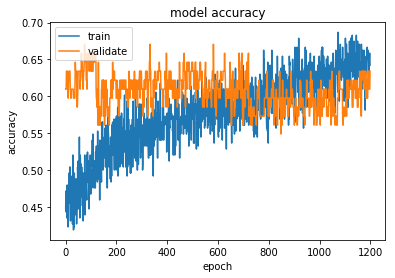

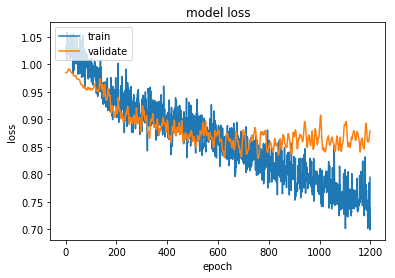

In [323]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [324]:
scores_train = model.evaluate(trainX, trainY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(validateX, validateY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(testX, testY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

246/246 [==============================] - 0s 157us/step
Train acc: 67.89%
82/82 [==============================] - 0s 195us/step
Train acc: 63.41%
82/82 [==============================] - 0s 343us/step
Train acc: 58.54%


In [325]:
predictions = model.predict(testX)
for k in range(len(testX)):
    a = [0]*3
    maxx = max(predictions[k])
    pos = 0
    for m in range(len(predictions[k])):
        if predictions[k][m] == maxx:
            pos = m
            break
    a[pos] = 1
    #print (predictions[k], " : ",  a, " : ",testY[k])
    print (a, " : ", list(testY[k]))

[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 0, 1]
[0, 1, 0]  :  [0, 1, 0]
[0, 1, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 1, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 0, 1]
[0, 0, 1]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 1, 0]
[0, 1, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 0, 1]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0

In [326]:
sequence = ['A', 'C', 'A', 'B', 'C']

sqd = []
for k in range(len(sequence)):
    sqd.append(ord(sequence[k]) - ord('A') + 1)

predictions = model.predict(np.array([[sqd]])) 

a = [0]*3
maxx = max(predictions[0])
pos = 0
for m in range(len(predictions[0])):
    if predictions[0][m] == maxx:
        pos = m
        break
a[pos] = 1

print (sqd, a)

if a[0] == 1:
    print ('A')
elif a[1] == 1:
    print ('B')
else:
    print ('C')

[1, 3, 1, 2, 3] [1, 0, 0]
A


In [327]:
model_json = model.to_json()
with open("model_lstm/model_6th.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_lstm/model_6th.h5")
print("Saved model to disk")

Saved model to disk
